In [4]:

import numpy as np
import pandas as pd
import os
import nltk
data = pd.read_csv('UpdatedResumeDataSet.csv')
data = pd.DataFrame(data)
print(data.head())        

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [5]:
print (data['Category'].unique())
print("")
print("Number of datapoints in each categories")
print(data['Category'].value_counts())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']

Number of datapoints in each categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
ETL Developer                40
Sales                        40
Operations Manager           40
Mechanical Engineer          40
Blockchain                   40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO               

<AxesSubplot:>

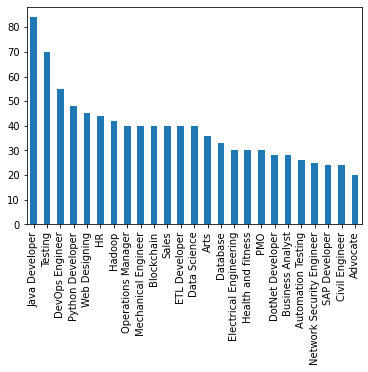

In [6]:
#Visualization of various categories
data['Category'].value_counts(sort=True).nlargest(25).plot.bar()

testResume = str(testResume)
print(testResume)

In [7]:
import re
import string
import nltk
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
    #convert text to lowercase
    text = text.lower() 
    #remove any numeric characters
    text = ''.join([word for word in text if not word.isdigit()]) 

#     text = [word for word in text if re.search("\d", word)== None]
    # remove URLs
    text = re.sub('http\S+\s*', ' ', text)  
    # remove RT and cc
    text = re.sub('RT|cc', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', '', text)  
    # remove mentions
    text = re.sub('@\S+', '  ', text)  
    #punctuations removal
    text = "".join([word for word in text if word not in string.punctuation])
    text = re.sub("\W", " ", str(text))
    #stopwords removal
    ext = [word for word in text.split() if word not in stopwords]
    #replace consecutive non-ASCII characters with a space
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    #extra whitespace removal
    text = re.sub('\s+', ' ', text)
    return text

data['cleaned_text'] = data['Resume'].apply(lambda x: clean_text(x))

In [27]:
data
for i in range(962): 
    row1 = data.iloc[i]
    row1[2].lower()
data    

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may be uitrgpv data s...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word b...
958,Testing,â Willingness to accept the challenges. â ...,willingness to a ept the challenges positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge mspower poi...


In [8]:
combRes = {}
for i in range(962): 
    row1 = data.iloc[i]
    combRes.setdefault(row1[0], '')
for i in range(962):
    row1 = data.iloc[i]
    combRes[row1[0]] += row1[2]   

In [140]:
common_english = ['school','processes','managers','time','ability','delivery','billing','operations','reporting','ensure', 'risk','monitor', 'maintain','senior','documentation', 'resource','lt','line','standards','knowledge','distribution','process','per', 'drawing', 'activities','panels', 'panel', 'completed','design', 'equipment', 'cable','plant', 'pvt', 'layout','maintenance', 'operation', 'control','management', 'report', 'responsible','requirement','worked','requirements','universe','team', 'issues','developer', 'users','reports', 'business','bo', 'hana','quality','are','client', 'all','role', 'sales','inspection', 'qaqc','cost', 'training','ltd', 'by','products', 'vendor','customer','technical','project','new','monthscompany','skill','more','less','analysis','using','from','exprience','maharashtra','january','description','company','~','o','used:','project','*','Â','Ã\x98Â','â\x9e¢','1','2','3','4','5','6','7','8','9''o','â\x9c\x93','application','â\x97\x8f','Ã±','as','â\x96ª','&','details','with','on','less','1','than','year','details','for','and', '-', 'the', 'to', 'of', 'is', 'a', 'exprience', 'skills', 'langauges', 'experience', 'langauges', 'skills', 'â\x80¢', 'in', 'months','technology','mumbai','managing','state','council','pune','projects','that','at','responsibilities','days', 'development','college', 'british', 'power','education','work', 'june', 'university','india','engineer', 'site', 'engineering', 'i', 'used', 'smart', 'computer', 'system']

In [141]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
keywords = {}
for i in range(962): 
    row1 = data.iloc[i]
    keywords.setdefault(row1[0], [])
for keys in combRes:
    tok = word_tokenize(combRes[keys])
    fdist = FreqDist()
    for word in tok:
        if word not in common_english:
            fdist[word] += 1 
    flist = dict(fdist)
    flist = sorted(flist.items(), key=lambda x: x[1], reverse=True)
    flist = flist[:4]
    for key in flist:
        keywords[keys].append(key[0])
for key in keywords:
    print(key, ": ", keywords[key])

Data Science :  ['data', 'learning', 'python', 'science']
HR :  ['hr', 'payroll', 'mba', 'statutory']
Advocate :  ['legal', 'law', 'advocate', 'court']
Arts :  ['arts', 'music', 'events', 'marketing']
Web Designing :  ['web', 'html', 'css', 'bootstrap']
Mechanical Engineer :  ['mechanical', 'vendors', 'machine', 'manufacturing']
Sales :  ['manager', 'marketing', 'ms', 'office']
Health and fitness :  ['fitness', 'health', 'gym', 'nutrition']
Civil Engineer :  ['civil', 'construction', 'drawings', 'material']
Java Developer :  ['java', 'ajax', 'spring', 'jsp']
Business Analyst :  ['test', 'testing', 'functional', 'analyst']
SAP Developer :  ['sap', 'data', 'webi', 'bods']
Automation Testing :  ['test', 'testing', 'automation', 'qtp']
Electrical Engineering :  ['electrical', 'autocad', 'drawings', 'protection']
Operations Manager :  ['services', 'ensuring', 'manager', 'job']
Python Developer :  ['python', 'internal', 'web', 'mysql']
DevOps Engineer :  ['shell', 'devops', 'build', 'mysql']

In [142]:
with open('fitnessTrainer.txt','r') as file:
    resume = file.read()
resume = resume.lower()    
print(resume)

about me
fitness trainer

extensive experienceof xx years inleadingclients through exercise routines; evaluating client fitness level and skillset to plan reachable goals; monitoring client through strength trainingand weightlifting; counselingand educatingclients on diet, nutrition, and exercise
skilled in creatinga workout plan tailored to client needs; motivating and encouragingclient through positive words while training; ensuringequipment use and physical exercises are performed safely; adjustingclient personalized plans as goals are reached; educating clients on weight lifting and training equipment
demonstrating andencouraging correct warm-up and stretching techniques to avoid injury; educating a wide range of clients of all ages based on their fitness capabilities; following-up all health and safety regulations when working with equipment
deliveringfitness, weight loss and nutrition programs for youth, teens, adults and senior citizens that are fun, safe, extremely effective an

In [143]:

jobs = set()
for key in keywords:
    for keywrd in keywords[key]:
        if keywrd in resume:
            jobs.add(key)
print("This resume can be applicable for", len(jobs), "jobs")
i = 1
for x in jobs:
    print(i,":",x)
    i += 1

This resume can be applicable for 7 jobs
1 : PMO
2 : Arts
3 : Health and fitness
4 : Sales
5 : HR
6 : Operations Manager
7 : DotNet Developer
